# Assignment 3 - Supervised Learning

## *Xingyu Liu*
Netid:  *xl264*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1-e^x}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the test set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

\begin{align}
(a)\quad
L(x)&=\prod_{i=1}^NP(y_i\,|\,x_i)=\prod_{i=1}^NP(y_i=1\,|\,x_i)^{y_i}P(y_i=0\,|\,x_i)^{1-{y_i}}\\
&=\prod_{i=1}^N\sigma(\textbf{w}^T\textbf{x}_i)^{y_i}[1-\sigma(\textbf{w}^T\textbf{x}_i)]^{1-y_i}
\end{align}

\begin{align*}
(b)\quad
C(w)& = -lnL(x)\\
&=-[\sum_{i=1}^Ny_iln\sigma(\textbf{w}^T\textbf{x}_i)+(1-y_i)ln(1-\sigma(\textbf{w}^T\textbf{x}_i))]
\end{align*}

\begin{align*}
(c)\quad\\
\frac{\partial C}{\partial w_j} &= \frac{\partial}{\partial w_j}-[\sum_{i=1}^Ny_iln\sigma(\textbf{w}^T\textbf{x}_i)+(1-y_i)ln(1-\sigma(\textbf{w}^T\textbf{x}_i))]\\
&= -\sum_{i=1}^Ny_i\frac{\partial}{\partial w_j}ln\sigma(\textbf{w}^T\textbf{x}_i)+(1-y_i)\frac{\partial}{\partial w_j}ln(1-\sigma(\textbf{w}^T\textbf{x}_i))\\
&= -\sum_{i=1}^Ny_i\frac{\frac{\partial}{\partial w_j} \sigma(\textbf{w}^T\textbf{x}_i)}{\sigma(\textbf{w}^T\textbf{x}_i)}+(1-y_i)\frac{\frac{\partial}{\partial w_j} 1-\sigma(\textbf{w}^T\textbf{x}_i)}{1-\sigma(\textbf{w}^T\textbf{x}_i)}\\
&= -\sum_{i=1}^N[y_i\frac{\sigma(\textbf{w}^T\textbf{x}_i)(1-\sigma(\textbf{w}^T\textbf{x}_i)\frac{\partial}{\partial w_j}(\textbf{w}^T\textbf{x}_i)}{\sigma(\textbf{w}^T\textbf{x}_i)}-(1-y_i)\frac{\sigma(\textbf{w}^T\textbf{x}_i)(1-\sigma(\textbf{w}^T\textbf{x}_i)\frac{\partial}{\partial w_j}(\textbf{w}^T\textbf{x}_i)}{1-\sigma(\textbf{w}^T\textbf{x}_i)}]\\
&\overset{\frac{\partial}{\partial w_j}(\textbf{w}^T\textbf{x}_i)=x_{i,j}}{=}-\sum_{i=1}^N[y_i(1-\sigma(\textbf{w}^T\textbf{x}_i))x_{i,j}-(1-y_i)\sigma(\textbf{w}^T\textbf{x}_i))x_{i,j}]\\
&=-\sum_{i=1}^N[y_i-y_i\sigma(\textbf{w}^T\textbf{x}_i)-\sigma(\textbf{w}^T\textbf{x}_i)+y_i\sigma(\textbf{w}^T\textbf{x}_i)]x_{i,j}\\
&=-\sum_{i=1}^N[y_i-\sigma(\textbf{w}^T\textbf{x}_i)]x_{i,j}\\
&=\sum_{i=1}^N[\sigma(\textbf{w}^T\textbf{x}_i)-y_i]x_{i,j}
\end{align*}
\begin{align*}
so\quad \frac{\partial C}{\partial w_0}=\sum_{i=1}^N[\sigma(\textbf{w}^T\textbf{x}_i)-y_i],\quad \frac{\partial C}{\partial w_1}=\sum_{i=1}^N[\sigma(\textbf{w}^T\textbf{x}_i)-y_i]x_{i,1},\quad \frac{\partial C}{\partial w_2}=\sum_{i=1}^N[\sigma(\textbf{w}^T\textbf{x}_i)-y_i]x_{i,2}
\end{align*}


\begin{align}
Appendix:\frac{d}{dx}\sigma(x)&=\frac{d}{dx}(\frac{1}{1+e^{-x}})\\
&=\frac{-{(1+e^{-x})^{'}}}{(1+e^{-x})^2}\\
&=\frac{e^{-x}}{(1+e^{-x})^2}\\
&=(\frac{1}{1+e^{-x}})(\frac{e^{-x}}{1+e^{-x}})\\
&=(\frac{1}{1+e^{-x}})(\frac{1+e^{-x}}{1+e^{-x}}-\frac{1}{1+e^{-x}})\\
&=\sigma(x)(1-\sigma(x))
\end{align}

\begin{align*}
(d)\quad w_{t+1} = w_t-\eta\frac{\partial C}{\partial w_j}
\end{align*}

**(e)**

In [2]:
import pandas as pd
data = pd.read_csv('data/A3_Q1_data.csv')
data.head()

,x1,x2,y
0,2.553124,0.337757,0.0
1,-0.877757,0.045790,1.0
2,-0.903528,0.368076,1.0
3,-1.532152,-0.863737,1.0
4,-0.046954,-0.388761,1.0


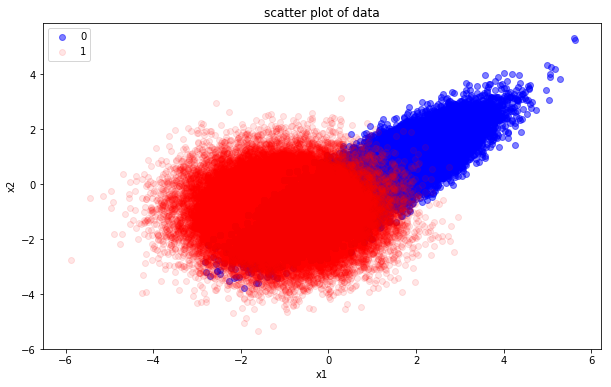

In [90]:
#scatter plot the data by class
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
plt.figure(figsize=(10, 6))
plt.scatter(data[data['y'] == 0].x1, data[data['y'] == 0].x2, c = 'b', label = '0',alpha = 0.5)
plt.scatter(data[data['y'] == 1].x1, data[data['y'] == 1].x2, c = 'r', label = '1', alpha = 0.1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('scatter plot of data')
plt.legend()
plt.show()

The data is not seperabel since there is a big overlap between two classes. I think logistic regression may not be a good choice because the boundary of two classes are not linear.

**(f)**

In [91]:
#(f) Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?
#missing value
data.isnull().any()

x1    False
x2    False
y     False
dtype: bool

In [92]:
data.describe()

,x1,x2,y
count,100000.000000,100000.000000,100000.000000
mean,0.048529,-0.397106,0.500000
std,1.452409,1.164015,0.500003
min,-5.886436,-5.352265,0.000000
25%,-1.041007,-1.206343,0.000000
50%,0.039551,-0.401099,0.500000
75%,1.143536,0.402899,1.000000
max,5.634476,5.317718,1.000000


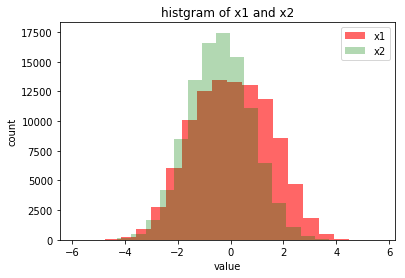

In [93]:
plt.hist(data.x1, color = 'r',alpha=0.6,bins=20,label='x1')
plt.hist(data.x2, color = 'g',alpha=0.3,bins=20, label='x2')
plt.xlabel('value')
plt.ylabel('count')
plt.title('histgram of x1 and x2')
plt.legend()
plt.show()

From the output, since there is not missing value we do not need to deal with missing value. However, from the histgram and discription table above, mean of x1 and x2 are different and the mean of x2 is 10 times smaller than mean of x1. It suggests that x1 and x2 may use differenc scaling strategies. To remediate it, i will standardize features by removing the mean and scaling to unit variance .

In [3]:
#(g)
import numpy as np
def logistic(z):
    return 1/(1+np.exp(-z))

In [4]:
#(h)
def costFunction(x,y,w):
    #x:(n,3)
    #y:(n,1)
    #w:(3,1)
    prediction = logistic(x@w)
    cost = -y@np.log(prediction)-(1-y)@np.log(1-prediction)
    n = len(y)
    return cost.sum()/n #using mean here to control the scale of cost

In [14]:
#(i)&(j)
def gradientDescent(X_train, X_test, y_train, y_test, weight, learningRate, stopCriteria):
    n, p = X_train.shape
    Xt = X_train.T
    delta= float('inf')
    cost_train = []
    cost_test = []
    iter = 1
    while delta > stopCriteria:
        y_pred = logistic(X_train@weight)
        epsilon = y_train - y_pred
        grad = Xt@epsilon/n
        #grad = epsilon@X_train/n
        new_weight = weight+learningRate*grad
        delta = np.sum((new_weight - weight)**2)
        weight = new_weight
        cost_train.append(costFunction(X_train, y_train, weight))
        cost_test.append(costFunction(X_test, y_test, weight))
    cost_train.append(costFunction(X_train, y_train, weight))
    cost_test.append(costFunction(X_test, y_test, weight))
    #if iter >= maxIter:
     #   print('Not converge with max iterations')
    return weight,cost_train,cost_test

(k) Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

In [15]:
#(k)
#split the train and test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = data[['x1','x2']]
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
#standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
X_train_norm = np.c_[np.ones(len(X_train_norm)), X_train_norm]
X_test_norm = np.c_[np.ones(len(X_test_norm)), X_test_norm]
#initialize weight
np.random.seed(1234)
original_weight = np.random.rand(3)
#learning rate set
lr_sets = [10,1,1e-1,1e-2]
optimal_weight = []
train_history = []
test_history = []
for i in range(len(lr_sets)):
    best, cost_train_history, cost_test_history = gradientDescent(X_train_norm, X_test_norm, y_train, y_test, original_weight, lr_sets[i], 1e-6)
    optimal_weight.append(best)
    train_history.append(cost_train_history)
    test_history.append(cost_test_history) 

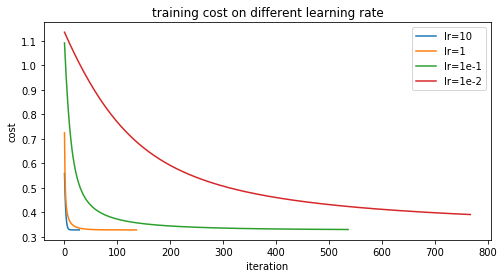

In [18]:
#plot
plt.figure(figsize=(8, 4))
plt.plot(range(len(train_history[0])),train_history[0],label='lr=10')
plt.plot(range(len(train_history[1])),train_history[1],label='lr=1')
plt.plot(range(len(train_history[2])),train_history[2],label='lr=1e-1')
plt.plot(range(len(train_history[3])),train_history[3],label='lr=1e-2')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('training cost on different learning rate')
plt.legend()
plt.show()

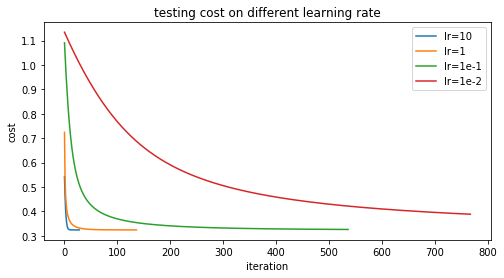

In [19]:
#plot
plt.figure(figsize=(8, 4))
plt.plot(range(len(test_history[0])),test_history[0],label='lr=10')
plt.plot(range(len(test_history[1])),test_history[1],label='lr=1')
plt.plot(range(len(test_history[2])),test_history[2],label='lr=1e-1')
plt.plot(range(len(test_history[3])),test_history[3],label='lr=1e-2')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('testing cost on different learning rate')
plt.legend()
plt.show()

From the plot above, we find no matter on the test set or training set, learning rate influence the converge time. As learning rate became smaller, it tool longer time to converge. But we should also notice that, when learning rate becomes very large, like 100, gradient descent can overshoot the minimum and fail to converge, or even diverge.(which is not displayed here)

From the plot, I will choose optimal learning rate to be 1e-1 because when learning rate is smaller than 1e-1, the converging process is very slow, which means will be also higher time complexity. Meanwhile, when lr is larger than 1e-1, they converge so drastically.

**(l) Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package StratifiedKFolds may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance.**

In [20]:
#(l)
def fit_cv(X_train, y_train, weight, learningRate, stopCriteria):
    n, p = X_train.shape
    Xt = X_train.T
    delta= float('inf')
    while delta > stopCriteria:
        y_pred = logistic(X_train@weight)
        epsilon = y_train - y_pred
        grad = Xt@epsilon/n
        new_weight = weight+learningRate*grad
        delta = np.sum((new_weight - weight)**2)
        weight = new_weight
    return weight

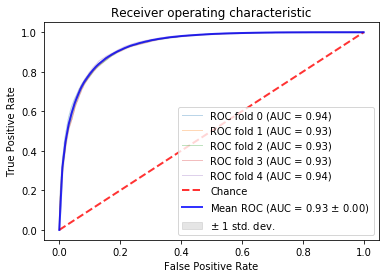

In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp
weightL = optimal_weight[2]
cv = StratifiedKFold(n_splits=5)
tprs=[]
aucs=[]
mean_fpr = np.linspace(0, 1, 100)
i = 0
for train, valid in cv.split(X,y):
    #normalize in each fold
    scaler_cv = StandardScaler()
    scaler_cv.fit(X.loc[train])
    X_train_cv = scaler.transform(X.loc[train])
    X_valid_cv = scaler.transform(X.loc[valid])
    X_train_cv = np.c_[np.ones(len(X_train_cv)), X_train_cv]
    X_valid_cv = np.c_[np.ones(len(X_valid_cv)), X_valid_cv]
    weight_cv = np.random.rand(3)
    trained_weight = fit_cv(X_train_cv, y.loc[train], weight_cv, 1e-1, 1e-6)
    probas_ = logistic(X_valid_cv@trained_weight)
    fpr, tpr, thresholds = roc_curve(y.iloc[valid], probas_)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i+=1


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC is quite close around each other and the standard variance is almost 0 which indicates that the data stratify sampled into 5 sets have very similar charasteristics. We can also see than the roc curves looks good in this case.

**(m) Why do we use cross validation?**

Cross Validation is used to assess the predictive performance of the models and and to judge how they perform outside the sample to a new data set also known as test data

The motivation to use cross validation techniques is that when we fit a model, we are fitting it to a training dataset. Without cross validation we only have information on how does our model perform to our in-sample data. Ideally we would like to see how does the model perform when we have a new data in terms of accuracy of its predictions. In science, theories are judged by its predictive performance.  

**(n) Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?**


In [100]:
#(n)
def logistic_predict(z, threshold):
    return 1/(1+np.exp(-z))>threshold

In [78]:
#find threshold
weight_n = np.random.rand(3)
trained_weight_n = fit_cv(X_train_norm, y_train, weight_n, 1e-1, 1e-6)
probas_n = logistic(X_train_norm@trained_weight_n)
fpr, tpr, thresholds = roc_curve(y_train, probas_n)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

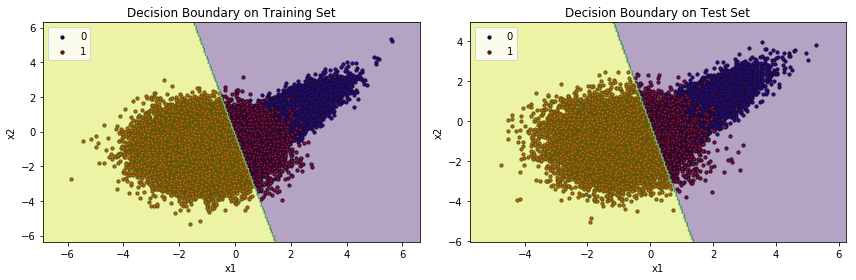

In [98]:
#traininig set
plt.figure(figsize=(12,4))
ax=plt.subplot(1,2,1)
colors = ['blue','red']
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
#Z = logistic_predict(X_train_norm@trained_weight_n, threshold)
temp = np.c_[xx.ravel(),yy.ravel()]
temp = np.c_[np.ones(len(temp)), temp]
Z = logistic_predict(temp@trained_weight_n,optimal_threshold)
Z = Z.reshape(xx.shape)
ax.scatter(X_train.iloc[:,0][y_train==0], X_train.iloc[:,1][y_train==0], c = colors[0], label = '0',s = 10, edgecolors='k')
ax.scatter(X_train.iloc[:,0][y_train==1], X_train.iloc[:,1][y_train==1], c = colors[1], label = '1',s = 10, edgecolors='k')
ax.contourf(xx,yy,Z,alpha=0.4)
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Decision Boundary on Training Set')
#testing set
ax=plt.subplot(1,2,2)
x_min, x_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
y_min, y_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
#Z = logistic_predict(X_test_norm_norm@trained_weight_n, threshold)
temp = np.c_[xx.ravel(),yy.ravel()]
temp = np.c_[np.ones(len(temp)), temp]
Z = logistic_predict(temp@trained_weight_n,optimal_threshold)
#Z = logistic_predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
ax.scatter(X_test.iloc[:,0][y_test==0], X_test.iloc[:,1][y_test==0], c = colors[0], label = '0',s = 10, edgecolors='k')
ax.scatter(X_test.iloc[:,0][y_test==1], X_test.iloc[:,1][y_test==1], c = colors[1], label = '1',s = 10, edgecolors='k')
ax.contourf(xx,yy,Z,alpha=0.4)
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Decision Boundary on Test Set')
plt.tight_layout()
plt.show()

**(o) Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?**

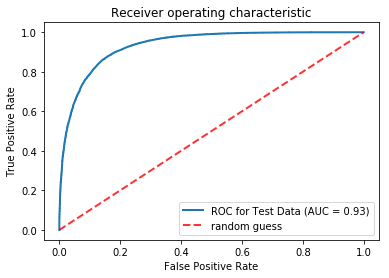

In [101]:
#(o)
tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,100)
i=0
probas_n = logistic(X_test_norm@trained_weight_n)
fpr, tpr, thresholds = roc_curve(y_test, probas_n)
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=2, label='ROC for Test Data (AUC = %0.2f)' %  roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='random guess', alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The AUC my model achieve is 0.93 and the auc of random guess is 0.5. Therefore, the trained model outperform than random guess a lot.

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

In [104]:
#(a)
import gzip
def read_mnist(images_path, labels_path):
    with gzip.open(labels_path, 'rb') as labelsFile:
        labels = np.frombuffer(labelsFile.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path,'rb') as imagesFile:
        length = len(labels)
        # Load flat 28x28 px images (784 px), and convert them to 28x28 px
        features = np.frombuffer(imagesFile.read(), dtype=np.uint8, offset=16) \
                        .reshape(length, 784) \
                        .reshape(length, 28, 28, 1)
        
    return features, labels

In [105]:
X_train, y_label_train = read_mnist('train-images-idx3-ubyte.gz','train-labels-idx1-ubyte.gz')
X_test, y_label_test = read_mnist('t10k-images-idx3-ubyte.gz','t10k-labels-idx1-ubyte.gz')

In [107]:
#convert y_label
y_train = np.array([1 if i == 3 else 0 for i in y_label_train])
y_test = np.array([1 if i == 3 else 0 for i in y_label_test])

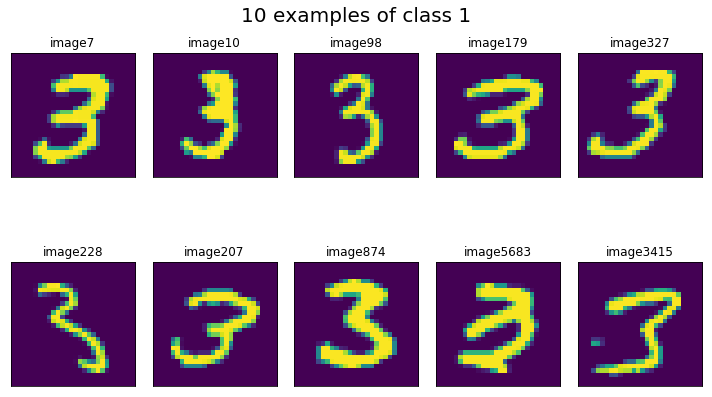

In [108]:
#(b)class1
class_1 = [7,10,98,179,327,228,207,874,5683,3415]
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 6),
                        subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(left=0.03, right=0.97, hspace=0.3, wspace=0.05)
for ax, idx in zip(axs.flat, class_1):
    ax.imshow(np.asarray(X_train[idx]).squeeze())
    ax.set_title('image'+str(idx))

plt.tight_layout()
plt.suptitle('10 examples of class 1',fontsize=20)
plt.show()

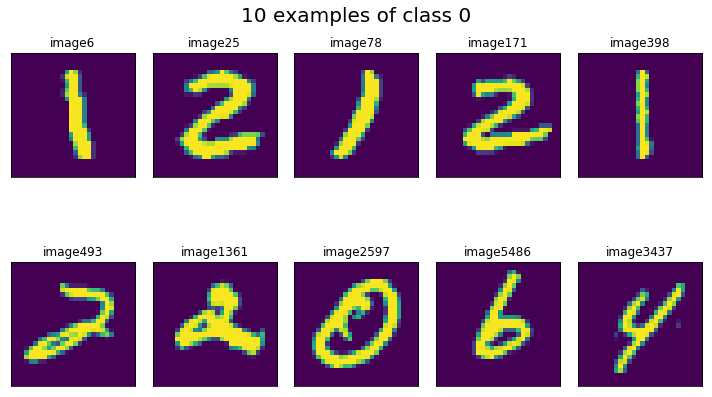

In [109]:
#(b)class0
class_1 = [6,25,78,171,398,493,1361,2597,5486,3437]
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 6),
                        subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(left=0.03, right=0.97, hspace=0.3, wspace=0.05)
for ax, idx in zip(axs.flat, class_1):
    ax.imshow(np.asarray(X_train[idx]).squeeze())
    ax.set_title('image'+str(idx))

plt.tight_layout()
plt.suptitle('10 examples of class 0',fontsize=20)
plt.show()

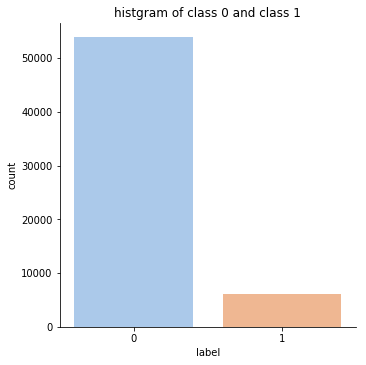

In [117]:
#(c)
import seaborn as sns
sns.catplot(x="label", kind="count", palette="pastel", data=pd.DataFrame(y_train,columns=['label']))
plt.title('histgram of class 0 and class 1')
plt.show()

In [115]:
print('class 0:',len(y_train[y_train==0]))
print('class 1:',len(y_train[y_train==1]))

class 0: 53869
class 1: 6131


Classes are not balanced

Problem: The most of algorithm are more focusing on classification of major sample while ignoring or misclassifying minority sample.  

In [118]:
#(d)
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten
from keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold, KFold
#data preprocessing
X_train_d = X_train/255 #(60000, 28, 28, 1)
X_test_d = X_test/255 #(10000, 28, 28, 1)
y_train_d = np_utils.to_categorical(y_train, num_classes=2)
y_test_d = np_utils.to_categorical(y_test, num_classes=2)
#build CNN classifier
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=5,padding='same',strides=1,batch_input_shape = (None, 28, 28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=2,strides=2,padding='same'))
model.add(Conv2D(64,5,strides=1,padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(2,2,'same'))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))
adam = Adam(lr=1e-4)
model.compile(optimizer=adam, loss='binary_crossentropy',metrics = ['accuracy'])
#fit model
#cv = StratifiedKFold(n_splits=3,random_state = 233)
cv = KFold(n_splits=3,random_state = 233)
folds = list(cv.split(X_train_d, y_train_d))
for i,(train_idx, val_idx) in enumerate(folds):
    print('Training on fold: ',i+1)
    X_train_cv = X_train_d[train_idx]
    y_train_cv = y_train_d[train_idx]
    X_valid_cv = X_train_d[val_idx]
    y_valid_cv = y_train_d[val_idx]
    
    model.fit(X_train_cv,y_train_cv, epochs=3,validation_data=(X_valid_cv,y_valid_cv))

Using TensorFlow backend.


Training on fold:  1
Train on 40000 samples, validate on 20000 samples
Epoch 1/3
40000/40000 [==============================] - 141s 4ms/step - loss: 0.0567 - acc: 0.9814 - val_loss: 0.0227 - val_acc: 0.9926
Epoch 2/3
40000/40000 [==============================] - 149s 4ms/step - loss: 0.0148 - acc: 0.9950 - val_loss: 0.0131 - val_acc: 0.9963
Epoch 3/3
40000/40000 [==============================] - 145s 4ms/step - loss: 0.0091 - acc: 0.9969 - val_loss: 0.0104 - val_acc: 0.9973
Training on fold:  2
Train on 40000 samples, validate on 20000 samples
Epoch 1/3
40000/40000 [==============================] - 152s 4ms/step - loss: 0.0088 - acc: 0.9972 - val_loss: 0.0065 - val_acc: 0.9974
Epoch 2/3
40000/40000 [==============================] - 146s 4ms/step - loss: 0.0059 - acc: 0.9982 - val_loss: 0.0068 - val_acc: 0.9977
Epoch 3/3
40000/40000 [==============================] - 160s 4ms/step - loss: 0.0048 - acc: 0.9987 - val_loss: 0.0036 - val_acc: 0.9987
Training on fold:  3
Train on 40000 

In [120]:
#prediction of model
from sklearn.metrics import roc_curve, precision_recall_curve
pred_cnn = model.predict_proba(X_test_d)

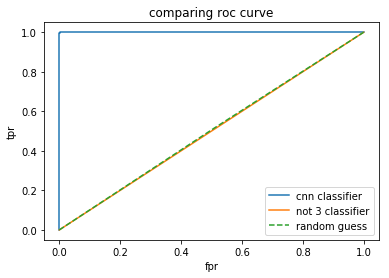

In [121]:
#compare roc curve
np.random.seed(12345)
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, pred_cnn[:,1])
fpr_not, tpr_not, _ = roc_curve(y_test, np.zeros(len(y_test)))
fpr_random, tpr_random,_ = roc_curve(y_test,np.random.randint(2, size=len(y_test)))
plt.plot(fpr_cnn, tpr_cnn, label='cnn classifier')
plt.plot(fpr_not, tpr_not, label='not 3 classifier')
plt.plot(fpr_random, tpr_random, label='random guess', linestyle='--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('comparing roc curve')
plt.legend()
plt.show()

In [ ]:
plt.plot(recall_cnn, pre_call, label='classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

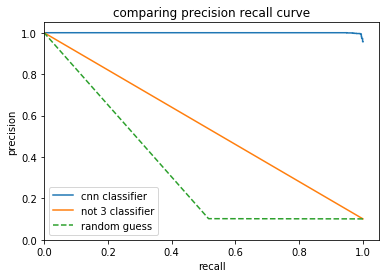

In [149]:
#compare pr curve
np.random.seed(12345)
pre_cnn, recall_cnn, _ = precision_recall_curve(y_test, pred_cnn[:,1])
pre_not, recall_not, _ = precision_recall_curve(y_test, np.zeros(len(y_test)))
pre_random, recall_random, _ = precision_recall_curve(y_test, np.random.randint(2, size=len(y_test)))
plt.plot(recall_cnn, pre_cnn, label='cnn classifier')
plt.plot(recall_not, pre_not, label='not 3 classifier')
plt.plot(recall_random, pre_random, label='random guess',linestyle='--')
plt.ylabel('precision')
plt.xlabel('recall')
plt.title('comparing precision recall curve')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.legend()
plt.show()

From the comparision above, it is obvious that the cnn model can perform much better than random guess and not 3 models. Cnn model can almost 1 auc and can classify quite well on mnist data set. 

And the discrepancies I found is that in the roc curve, not 3 model and random guess have almost the same roc curve. However, when comparing the precision recall curve, random guess is worse than not 3 classifier, which is owned to the imbalanced class in this case. This also suggest that if the number of negative samples is very large, the false positive rate increases more slowly. Because the true negative would probably be very high. However, precision is not affected by a large number of negative samples because it more focuses on the positive class than in the negative class and it actually measures the probability of correct detection of positive values, while FPR and TPR(roc metrics) measure the ability to distinguish between the classes. 

(f) Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the LogisticRegression module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter  CC  is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3)  F1F1 -score, and (4) area under the curve (AUC). Describe the implications of your findings.

In [336]:
#(f)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
X_train_f = X_train.reshape(60000, 784)
X_test_f = X_test.reshape(10000, 784)
C = [10, 1, 1e-1, 1e-2, 1e-3, 1e-4]
nonZeroPara = []
cost = []
f1 = []
auc = []
for c in C:
    logLassoClf = LogisticRegression(random_state=0, C = c,
                                 penalty='l1').fit(X_train_f, y_train)
    nonZeroPara.append(np.count_nonzero(logLassoClf.coef_))
    cost.append(costFunction(X_train_f, y_train, (logLassoClf.coef_).T))
    y_pred = logLassoClf.predict(X_test_f)
    y_score = logLassoClf.predict_proba(X_test_f)[:,1]
    f1.append(f1_score(y_test, y_pred))
    auc.append(roc_auc_score(y_test, y_score))

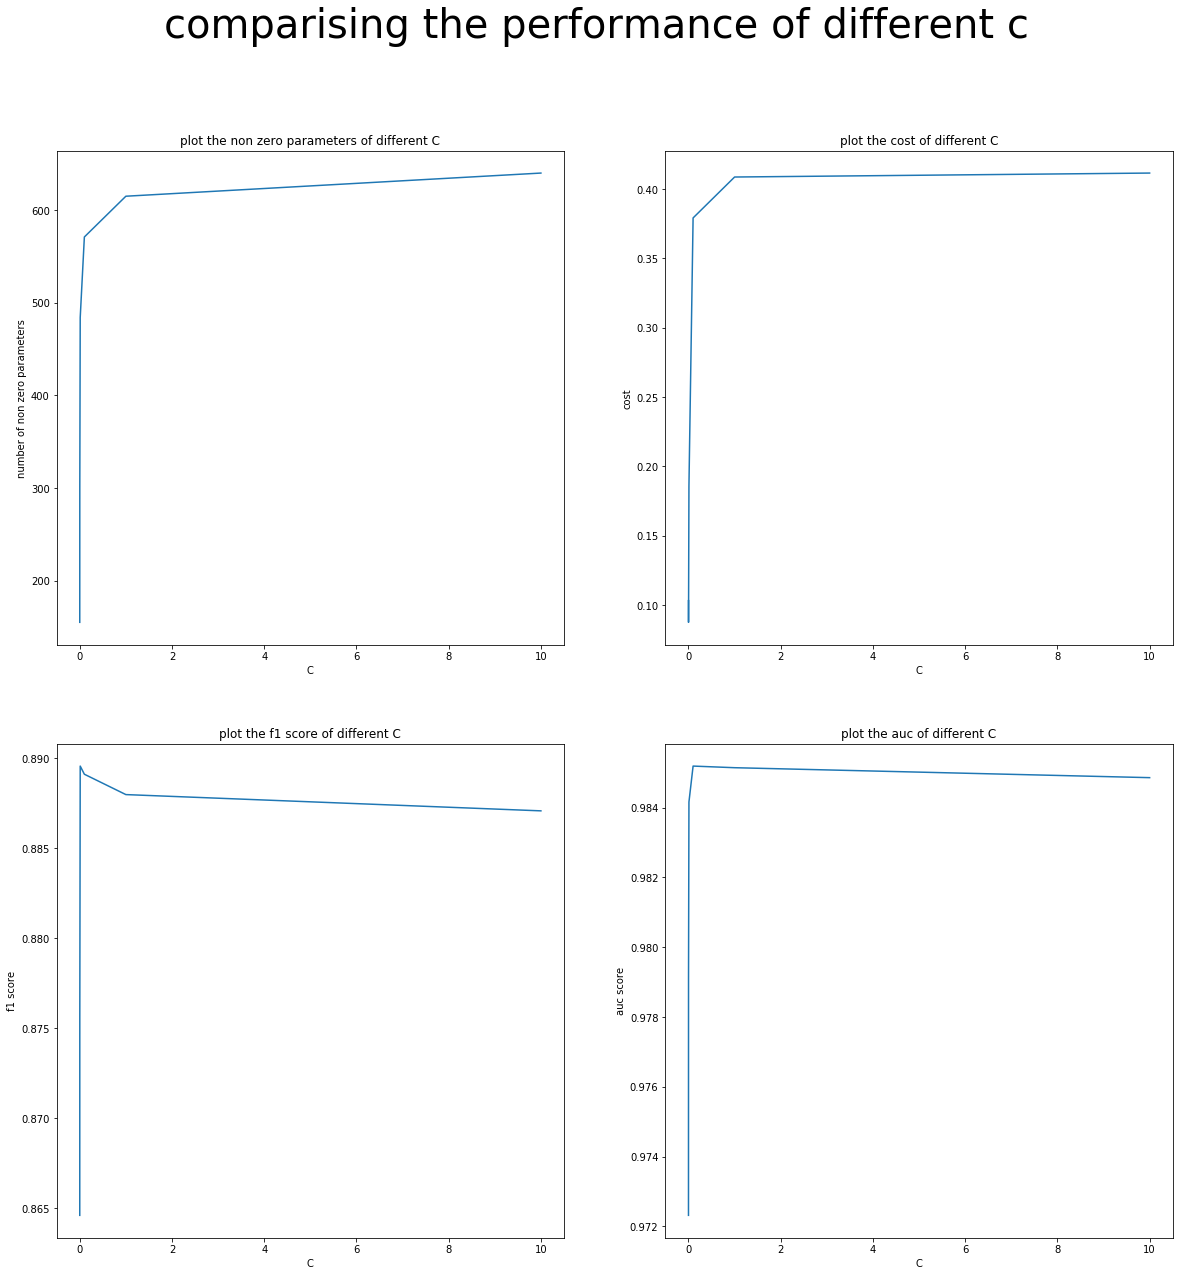

In [377]:
plt.figure(figsize=(15,15))
plt.suptitle('comparising the performance of different c',fontsize=40)
plt.subplot(2,2,1)
plt.plot(C, nonZeroPara)
plt.xlabel('C')
plt.ylabel('number of non zero parameters')
plt.title('plot the non zero parameters of different C')
plt.subplot(2,2,2)
plt.plot(C, cost)
plt.xlabel('C')
plt.ylabel('cost')
plt.title('plot the cost of different C')
plt.subplot(2,2,3)
plt.plot(C, f1)
plt.xlabel('C')
plt.ylabel('f1 score')
plt.title('plot the f1 score of different C')
plt.subplot(2,2,4)
plt.plot(C, auc)
plt.xlabel('C')
plt.ylabel('auc score')
plt.title('plot the auc of different C')
plt.show()

In [385]:
print('when c =',C[auc.index(max(auc))],'auc is max and max(auc) =', 
      max(auc))
print('when c =',C[f1.index(max(f1))],'f1 score is max and max(f1) =', 
      max(f1))

when c = 0.1 auc is max and max(auc) = 0.9851881628652297
when c = 0.01 f1 score is max and max(f1) = 0.8895674300254454


In [381]:
C[f1.index(max(f1))]

0.01

Implications:

When C becomes larger, the regularization strength becomes smaller and the penalty of regularization becomes smaller and the non zero parameters become more and the cost also becomes more.


When C becomes larger, the f1 score and auc score first increase then decrease. From the result, we get maximum auc when c is 0.1 and we get maximum f1 when c is 0.01.


This also implies that as c becomes larger, model’s performance first increase than decrease.

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

**(a)**  This dataset is from a non-profit arm and it is the historical data of potential doners. The goal is to train a model to determine whether a person will donate or not to that non-profit. Obviously, this is a binary classification question. 

I find it interesting because: 

It is really a problem for many non-profits that since just few people donate to support them, they are actually in the poor financial situation. In this case, if we can more accurately target the potential doner, it will help non-profit to attract more financial support.


**(b)** Data dictionary:

• State = The state abbreviation

• Domain = Domain Code, which can be broken down to two bytes.
are 20850 data entries and 13 columns (including 2 target variables)
1st byte = Urbanization level of the potential donor’s neighborhood U = Urban; C = City; S = Suburban; T = Town; R = Rural
2nd byte = Socio-Economic status of the neighborhood 1 = Highest SES; 2 = Average SES; 3 = Lowest SES

• Age = Potential donor’s age

• Income_range = Potential donor’s income range, from highest income level(7) to lowest income
level(1)

• Gender = Potential donor’s gender
F = Female; M = Male; U = Unwilling to tell

• Gov = Years have been employed by government, including local government, state government and federal government.

• Cardprom = Lifetime number of card promotions received to date. Card promotions are promotion type FS, GK, TK, SK, NK, XK, UF, UU.

• Numprom = Lifetime number of promotions received to date

• Ramntall = Dollar amount of lifetime gifts to date

• Homeownr = home owner flag:
H = Home owner; U = Unknown

• Responded = Target variable, binary indicator for response to the most recent mailing from charity


In [76]:
df = pd.read_csv('assign3_q3_data1.csv')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20850 entries, 0 to 20849
Data columns (total 11 columns):
state           20850 non-null category
domain          20850 non-null category
age             20850 non-null int64
homeownr        20850 non-null category
income_range    20850 non-null category
gender          20850 non-null category
gov             20850 non-null int64
cardprom        20850 non-null int64
numprom         20850 non-null int64
ramntall        20850 non-null float64
responded       20850 non-null category
dtypes: category(6), float64(1), int64(4)
memory usage: 939.7 KB


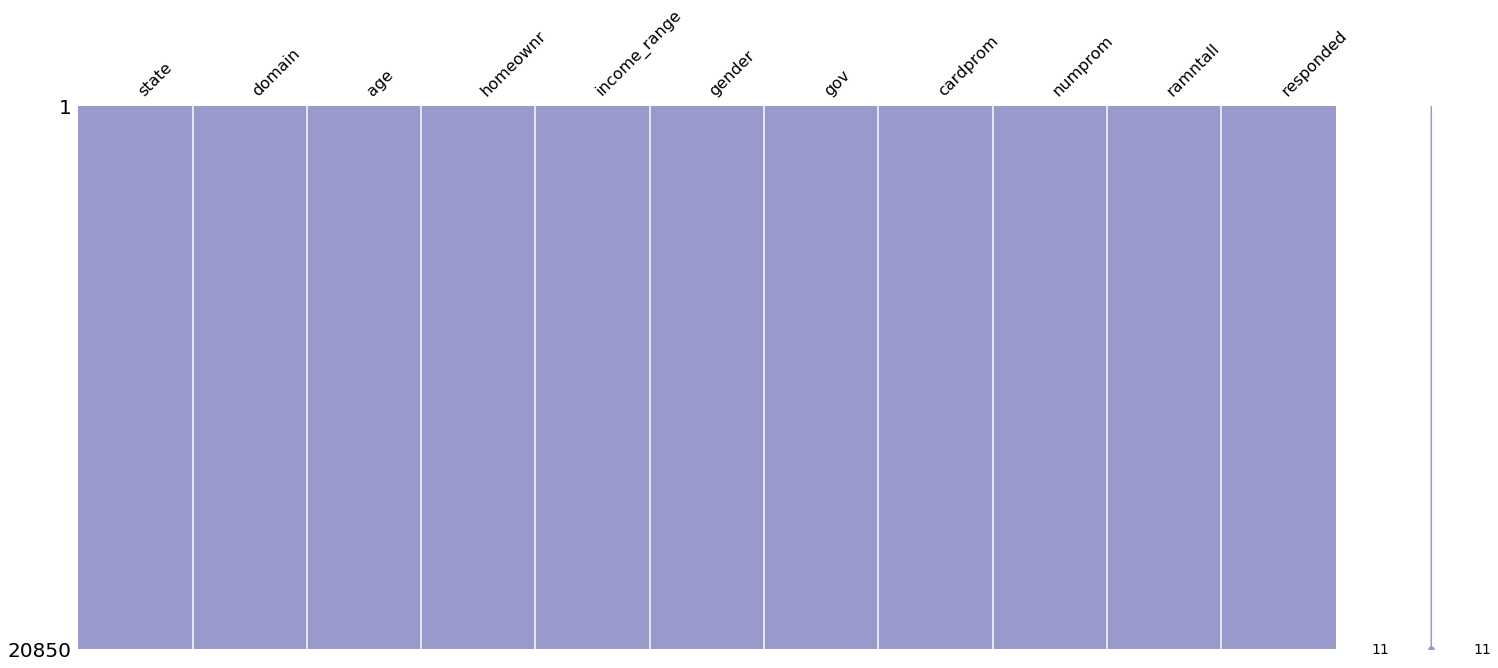

In [5]:
#visulize missing value
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df,color=(0.6, 0.6, 0.8)).figure

From the visualization of missing value above, we found there is no missing value there and thus we do need to deal with the missing value. And I am going to visualization the data.

In [14]:
population = pd.DataFrame(df['state'].value_counts())
population = population.rename(columns={'state':'count'})
population['state']=population.index
population.index=range(len(population))
from plotly.offline import init_notebook_mode, iplot
import plotly.plotly as py
import plotly.figure_factory as ff
colorscale = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
data = [ dict(
        type='choropleth',
        colorscale = 'Viridis',
        autocolorscale = False,
        # 位置由各州的编号，即缩写表示
        locations = population['state'],
        # 每个州的颜色深度由出口总值表示，出口总值越高颜色越紫
        z = population['count'],
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        # 设立颜色条注释
        colorbar = dict(
            title = "people")
        ) ]

layout = dict(
        title = "potential donors' geographic distribution",
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' )
        )
)
    
fig = dict( data=data, layout=layout)
py.iplot(fig)

From the geographic distribution of potential donors, we find that most doners are from California. People from Florida, Texas, Illinos and Michigan also donate money. Most people from the middle part of the USA do not donate. We can see that potential doners distribute in the coast area or the Great Lake Region. 

Text(0.5, 1.0, 'Correlation between features')

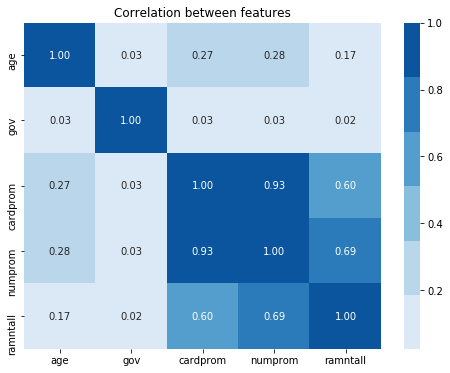

<Figure size 576x288 with 0 Axes>

In [5]:
#check feature's correlation
import seaborn as sns
%matplotlib inline
f, ax= plt.subplots(figsize = (8, 6))
continuous_df = pd.DataFrame(df,columns=['age','gov','cardprom','numprom','ramntall'])
plt.figure(figsize=(8,4))
cmap = sns.color_palette("Blues")
sns.heatmap(continuous_df.corr(),cmap=cmap,annot=True, fmt='.2f',ax = ax)
ax.set_title('Correlation between features')

From the correlation heatmap we can easily find cardprom is highly correlated with numprom, so I will just use numprom.

In [77]:
df = df.drop(['cardprom'], axis = 1)

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


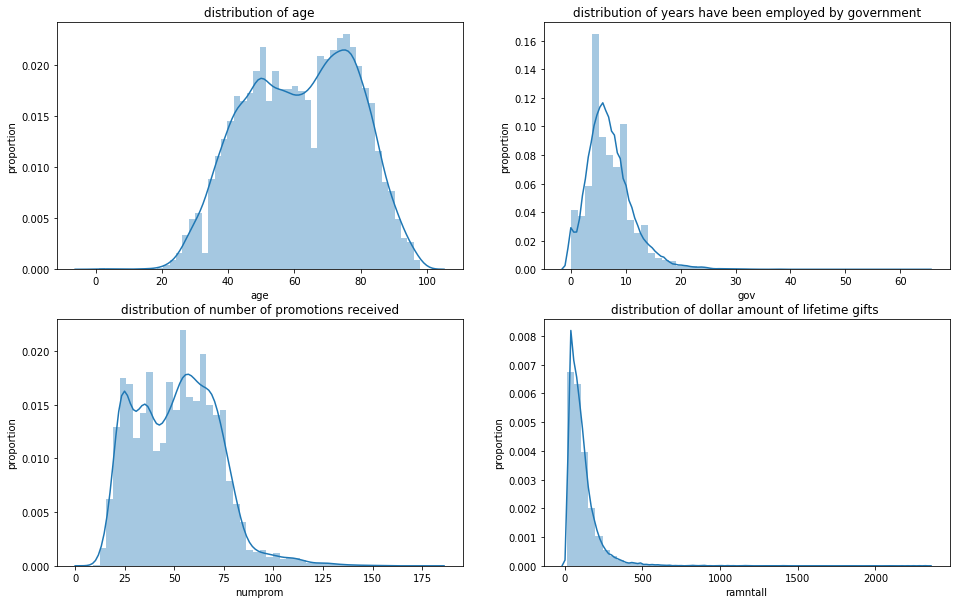

In [25]:
plt.figure(figsize=(16,10))
#plot
plt.subplot(2,2,1)
sns.distplot(df.age).set_title('distribution of age')
plt.ylabel('proportion')
plt.subplot(2,2,2)
sns.distplot(df.gov).set_title('distribution of years have been employed by government')
plt.ylabel('proportion')
plt.subplot(2,2,3)
sns.distplot(df.numprom).set_title('distribution of number of promotions received')
plt.ylabel('proportion')
plt.subplot(2,2,4)
sns.distplot(df.ramntall).set_title('distribution of dollar amount of lifetime gifts ')
plt.ylabel('proportion')
plt.show()

From the plots above:

1.The age range of most people is 30 to 80 years old and most people are over 40 years old.

2.People do not have many works years in government, and most have 3 years in government.

3.Most peopel received the promotions before and the number range from 25 to 80.

4.People did not receive very high dollar amount of gifts and most are under 500. 

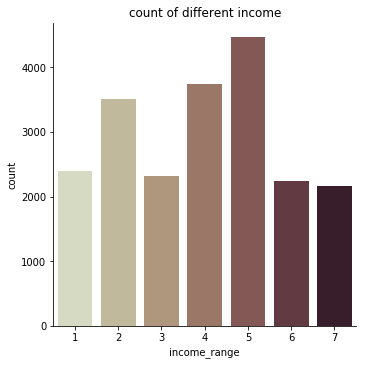

In [32]:
sns.catplot(x="income_range", kind="count", palette="ch:.5", data=df)
plt.title('count of different income')
plt.show()

We can see than the distribution of income a little bit even and most people belong to 4-5(middle level).

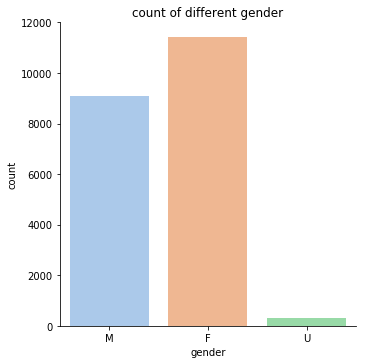

In [34]:
sns.catplot(x="gender", kind="count", palette="pastel", data=df)
plt.title('count of different gender')
plt.show()

In this dataset, the number of female is larger than male and some people are not willing to tell their gender.

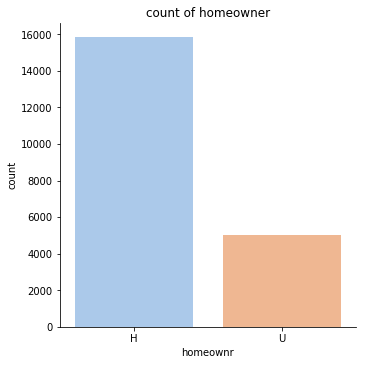

In [37]:
sns.catplot(x="homeownr", kind="count", palette="pastel", data=df)
plt.title('count of homeowner')
plt.show()

In this dataset, more people are homeowners.

**(c)** The target variable is "responded", which means whether a person will donate or not.

Predictors:state, domain, age, homeowne, income_range, gender, gov, numprom, ramntall

Preprocessing:

1.As the visualization of missing value in part(b), there is no missing value in this dataset.

2.Although the continuous variables are in different range, it is not necessary to normalization them in random forest because random forest is invariant to monotonic transformations of individual features and feature scalings will not change anything for the Random Forest.

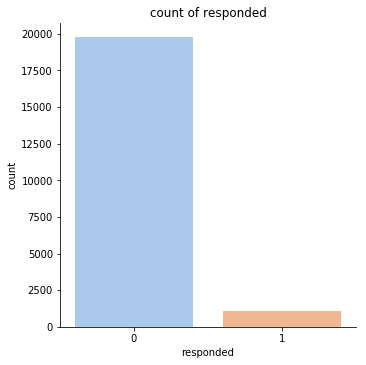

In [45]:
sns.catplot(x="responded", kind="count", palette="pastel", data=df)
plt.title('count of responded')
plt.show()

**(d)** I am going to use random forest because:

1.There are 20850 observations in this dataset and this size is not very small, which can be used to train random forest model.

2.Random forest may yield higher accuracy.

3.Random Forest works well with a mixture of numerical and categorical features.

**(e)** Since this is a binary classification problem, I will use the ROC curve to evaluate the models' performance.

**(f)** I will choose to use cross validation here because there are some hyperparameters in random forest and we can make use to cross validation to better train our model

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.state = le.fit(df.state).transform(df.state)
df.domain = le.fit(df.domain).transform(df.domain)
df.homeownr = le.fit(df.homeownr).transform(df.homeownr)
df.gender = le.fit(df.gender).transform(df.gender)
df.homeownr = df.homeownr.astype('category')
df.state = df.state.astype('category')
df.domain = df.domain.astype('category')
df.income_range = df.income_range.astype('category')
df.gender = df.gender.astype('category')
#df.responded = df.responded.astype('category')
X = df.drop(['responded'],axis = 1)
y = df['responded']

In [82]:
X.head()

,state,domain,age,homeownr,income_range,gender,gov,numprom,ramntall
0,18,10,48,0,5,1,5,24,27.0
1,23,13,22,0,4,0,3,21,42.0
2,25,4,70,0,6,0,10,59,305.0
3,39,10,34,1,3,1,2,57,101.0
4,19,11,63,0,3,0,12,23,25.0


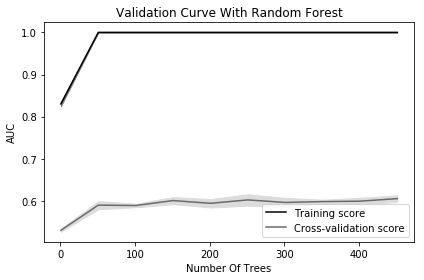

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 500, 50)
train_scores, test_scores = validation_curve(RandomForestClassifier(), X, y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, scoring="roc_auc")
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#plot
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")
# Plot bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("AUC")
plt.tight_layout()
plt.legend()
plt.show()

From the plot above, we find as the number of trees increase, the auc first increase then almost remain the same. In this case, we take both the computation complexity and model performance into consideration and choose the optimal number to be 50 because when the number is 50,both training score and valication score reach the maximum.

In [87]:
#final model
rf_clf = RandomForestClassifier(n_estimators=50)
rf_clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

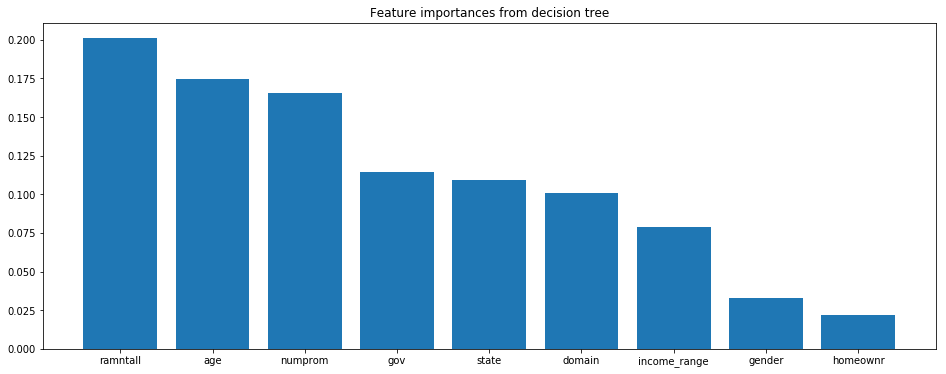

In [88]:
X_labels = X.columns
tree_importance_df = rf_clf.feature_importances_
tree_indices_df = np.argsort(tree_importance_df)[::-1]
plt.figure(figsize=(16,6))
coolwarm = plt.get_cmap('coolwarm')
plt.title("Feature importances from decision tree")
plt.bar(range(X.shape[1]), tree_importance_df[tree_indices_df],align="center")
plt.xticks(range(X.shape[1]),X_labels[tree_indices_df])
plt.show()

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

For this model, we need to input all the predictors and the model will give its prediction for responded as the output.

From the performance plot during the training process, i think this model does not work well and since there is a large gap between training score and cross-validation score, there may be some overfitting problem.

To improve, first we may need to not adjust the "n_estimators", but should also try other hyperparameters and try different combinations of them. Second, since this dataset is not very balanced, we may need to make use of some imbalanced learning methods to deal with it. Thirdly, we need to gather more data for training process.

**(i) Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.**


In order to assist non-profit to determine whether a person will donate to support their work, I trained a predictive model based on random forest. From the model, I found both number of promotions and amount of gifts were important predictors for prediction.